# Cours : Algorithme des $k$ plus proches voisins

Nous allons classifier deux ensembles de points (rouge et bleu) issus de deux distributions gaussiennes (de paramètres différents), avec la méthode des $k$ plus proches voisins :

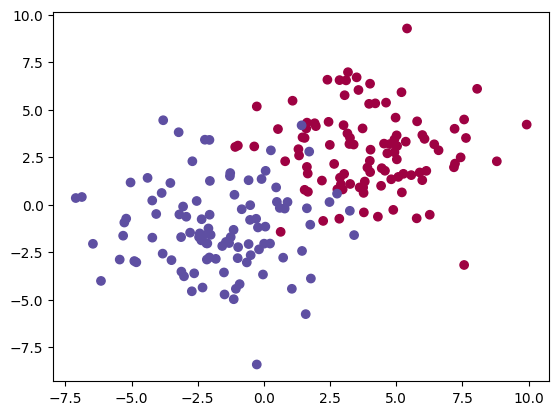

In [1]:
 
import matplotlib.pyplot as plt
import numpy as np


def points(n):
    tX1 = np.random.multivariate_normal([4, 3], 5*np.eye(2), n) # points de classe 0
    tX2 = np.random.multivariate_normal([-2, -1], 5*np.eye(2), n) # points de classe 1
    X = np.vstack((tX1, tX2))
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

X, y = points(100)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.Spectral);

## Algorithme des $k$ plus proches voisins

In [2]:
def d(x, y):
    s = 0
    for i in range(len(x)):
        s += (x[i] - y[i])**2
    return s**.5

In [3]:
def voisins(x, X, k): 
	# renvoie les k plus proches voisins de x dans X
	indices = sorted(range(len(X)), key=lambda i: d(x, X[i]))
	return indices[:k]

In [4]:
def maj(L):
	compte = {} # compte[e] = nombre d'occurrences de e dans L
	for e in L:
		compte[e] = compte.get(e, 0) + 1
	return max(compte, key=compte.get)

In [5]:
def knn(x, X, Y, k):
	V = voisins(x, X, k)
	return maj([Y[i] for i in V])

In [6]:
def separer(X, Y, p):
	X_train, X_test, Y_train, Y_test = [], [], [], []
	for i in range(len(X)):
		if i <= p * len(X):
			X_train.append(X[i])
			Y_train.append(Y[i])
		else:
			X_test.append(X[i])
			Y_test.append(Y[i])
	return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = separer(X, y, 0.8)

def predict(x, k):
	return knn(x, X_train, Y_train, k)

In [7]:
def precision(k):
	n = len(X_test)
	p = 0
	for i in range(n):
		if predict(X_test[i], k) == Y_test[i]:
			p += 1
	return p/n

precision(5)

0.8717948717948718

## En utilisant sklearn

`sklearn` donne le même résultat, mais est beaucoup plus rapide (tester avec $n = 10000$ points, par exemple) :

In [8]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, Y_train)
neigh.score(X_test, Y_test)

0.8717948717948718